In [57]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

sns.set(context="talk")

In [2]:
def create_single_df(file_name):
    with open(file_name) as f:
        results = json.load(f)['results']

    trainer = []
    rule_value = []
    rule_type = []
    training_time = []
    memory = []

    regex = re.compile(r'0: Memory Usage: (\d+\.\d+), Training Duration: (\d+\.\d+)')

    for result in results:
        trainer.append(result["trainer"].capitalize())
        rule_value.append(result['rule_value'])
        rule_type.append(result['rule_type'])
        memory.append(float(regex.search(result['stderr']).group(1)))
        training_time.append(float(regex.search(result['stderr']).group(2)))

    return pd.DataFrame({"Trainer": trainer, "Rule Type": rule_type, "Rule Value": rule_value, "Training Time": training_time, "Memory": memory})

def create_df():
    return pd.concat([create_single_df("results_network_202007211500.json"), create_single_df("results_network_202007211630.json")])
    

In [41]:
df = create_df()

In [11]:
print(df[df["Rule Type"] == "delay"]["Rule Value"].unique())
print(df[df["Rule Type"] == "loss"]["Rule Value"].unique())

[  0.   1.   2.   5.  10.  25.  50. 100. 200. 300. 400.]
[ 0.   0.1  0.5  1.   2.   5.  10.  15. ]


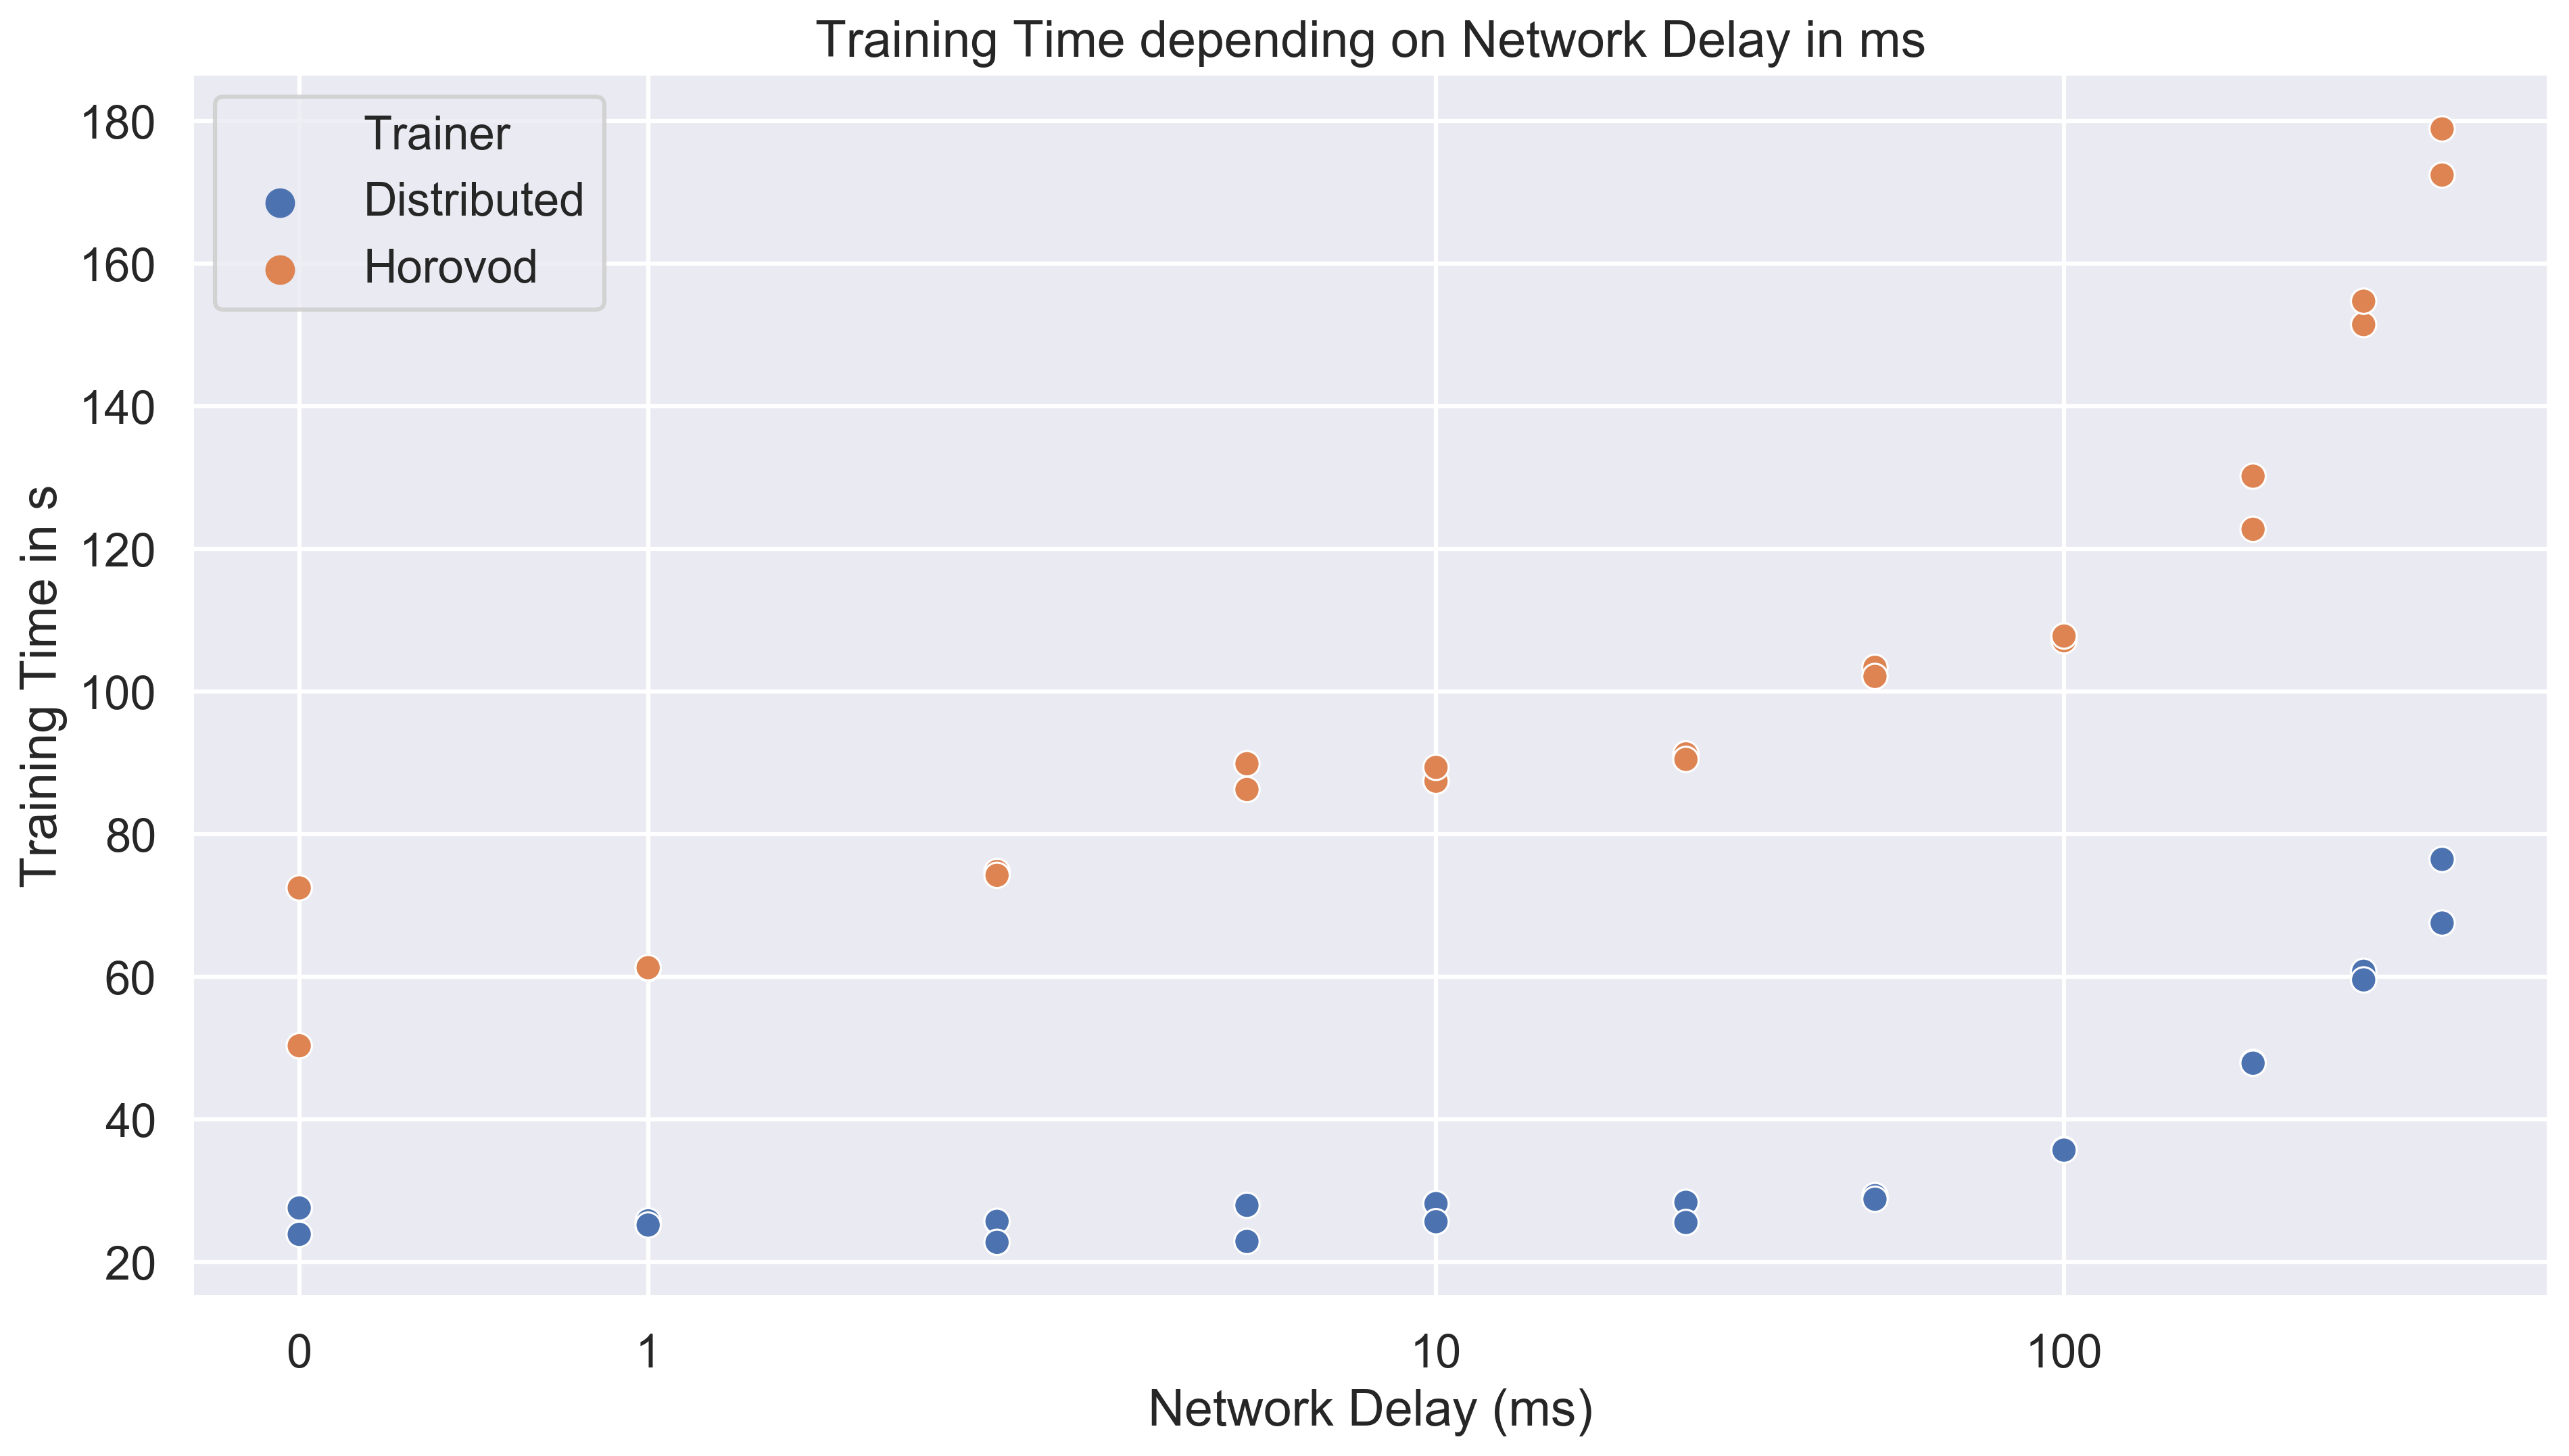

In [80]:
plt.figure(figsize=(15, 8), dpi= 300)
ax = sns.scatterplot(x="Rule Value", y="Training Time", data=df[df["Rule Type"] == "delay"], hue="Trainer")
ax.set_title("Training Time depending on Network Delay in ms")
ax.set_xlabel("Network Delay (ms)")
ax.set_ylabel("Training Time in s")
ax.set_xscale('symlog')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

In [18]:
delay = df[df["Rule Type"] == "delay"].drop("Rule Type", axis=1)
delay = delay.groupby(["Trainer", "Rule Value"]).mean().reset_index()

In [48]:
loss = df[df["Rule Type"] == "loss"].drop("Rule Type", axis=1)

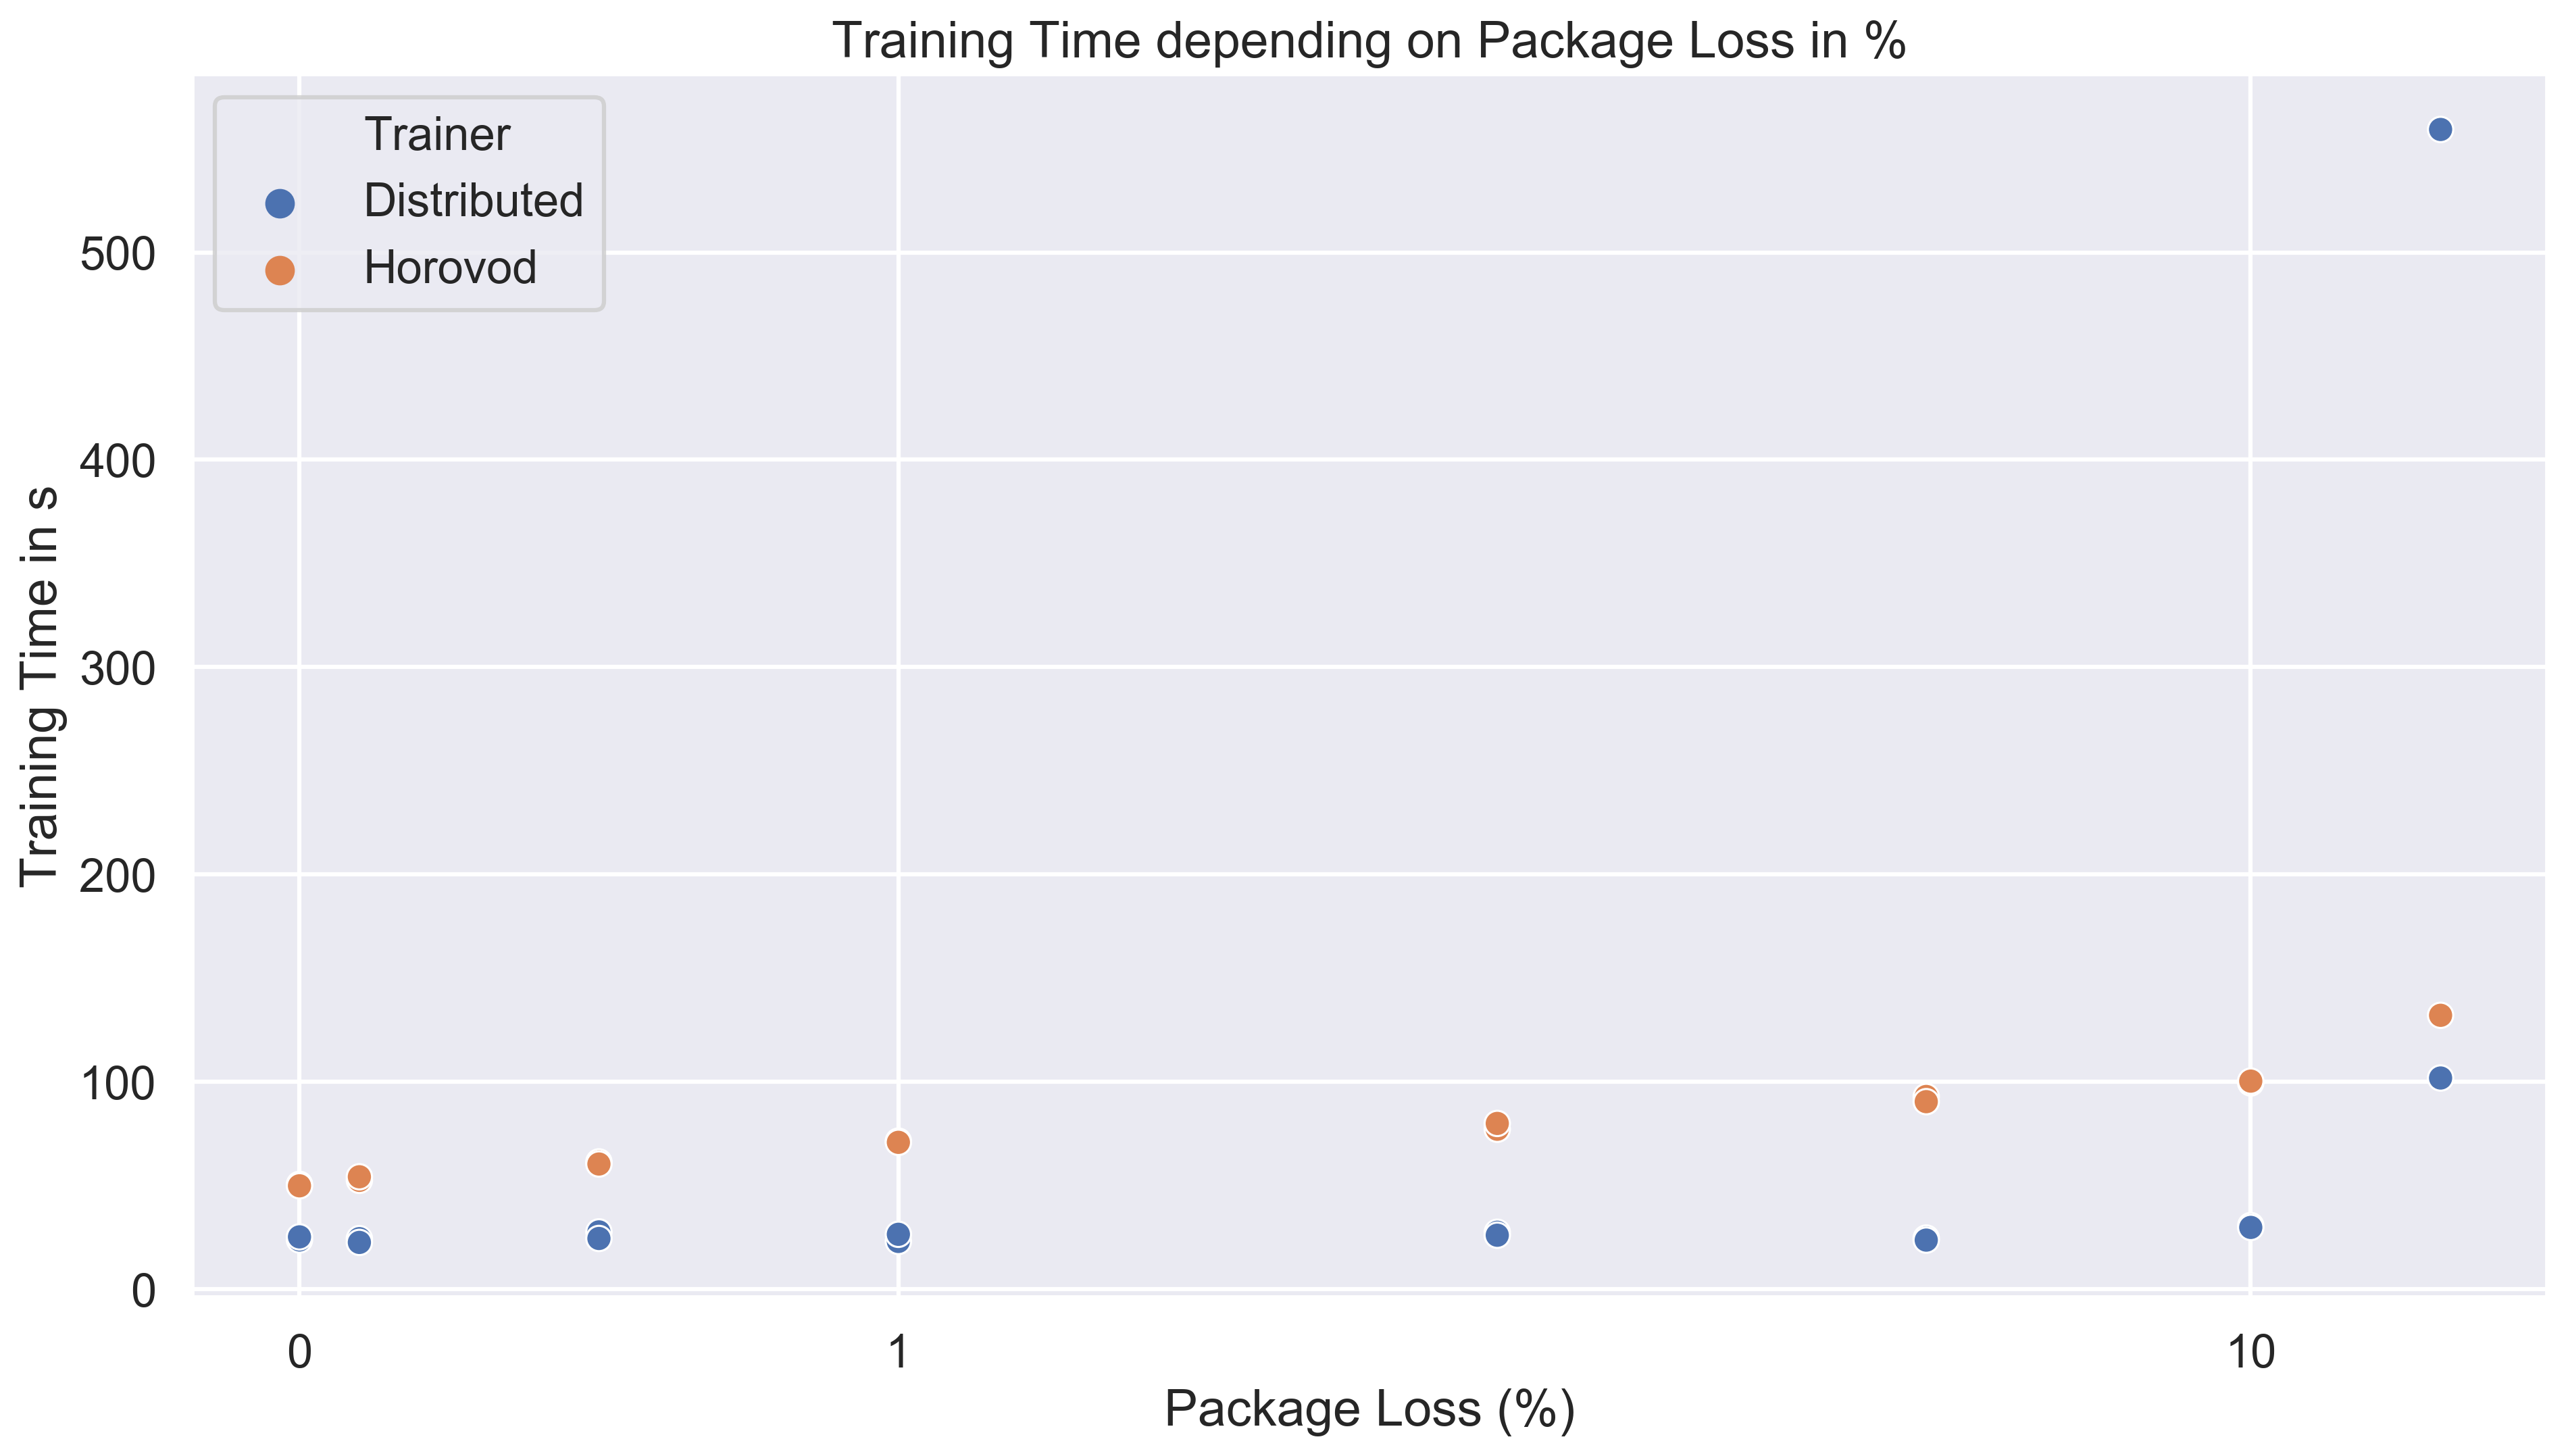

In [81]:
plt.figure(figsize=(15, 8), dpi= 300)
ax = sns.scatterplot(x="Rule Value", y="Training Time", data=loss, hue="Trainer")
ax.set_title("Training Time depending on Package Loss in %")
ax.set_xlabel("Package Loss (%)")
ax.set_ylabel("Training Time in s")
ax.set_xscale('symlog')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

In [70]:
loss = df[df["Rule Type"] == "loss"].drop("Rule Type", axis=1)
#loss = df.groupby(["Trainer", "Rule Value"]).mean().reset_index()

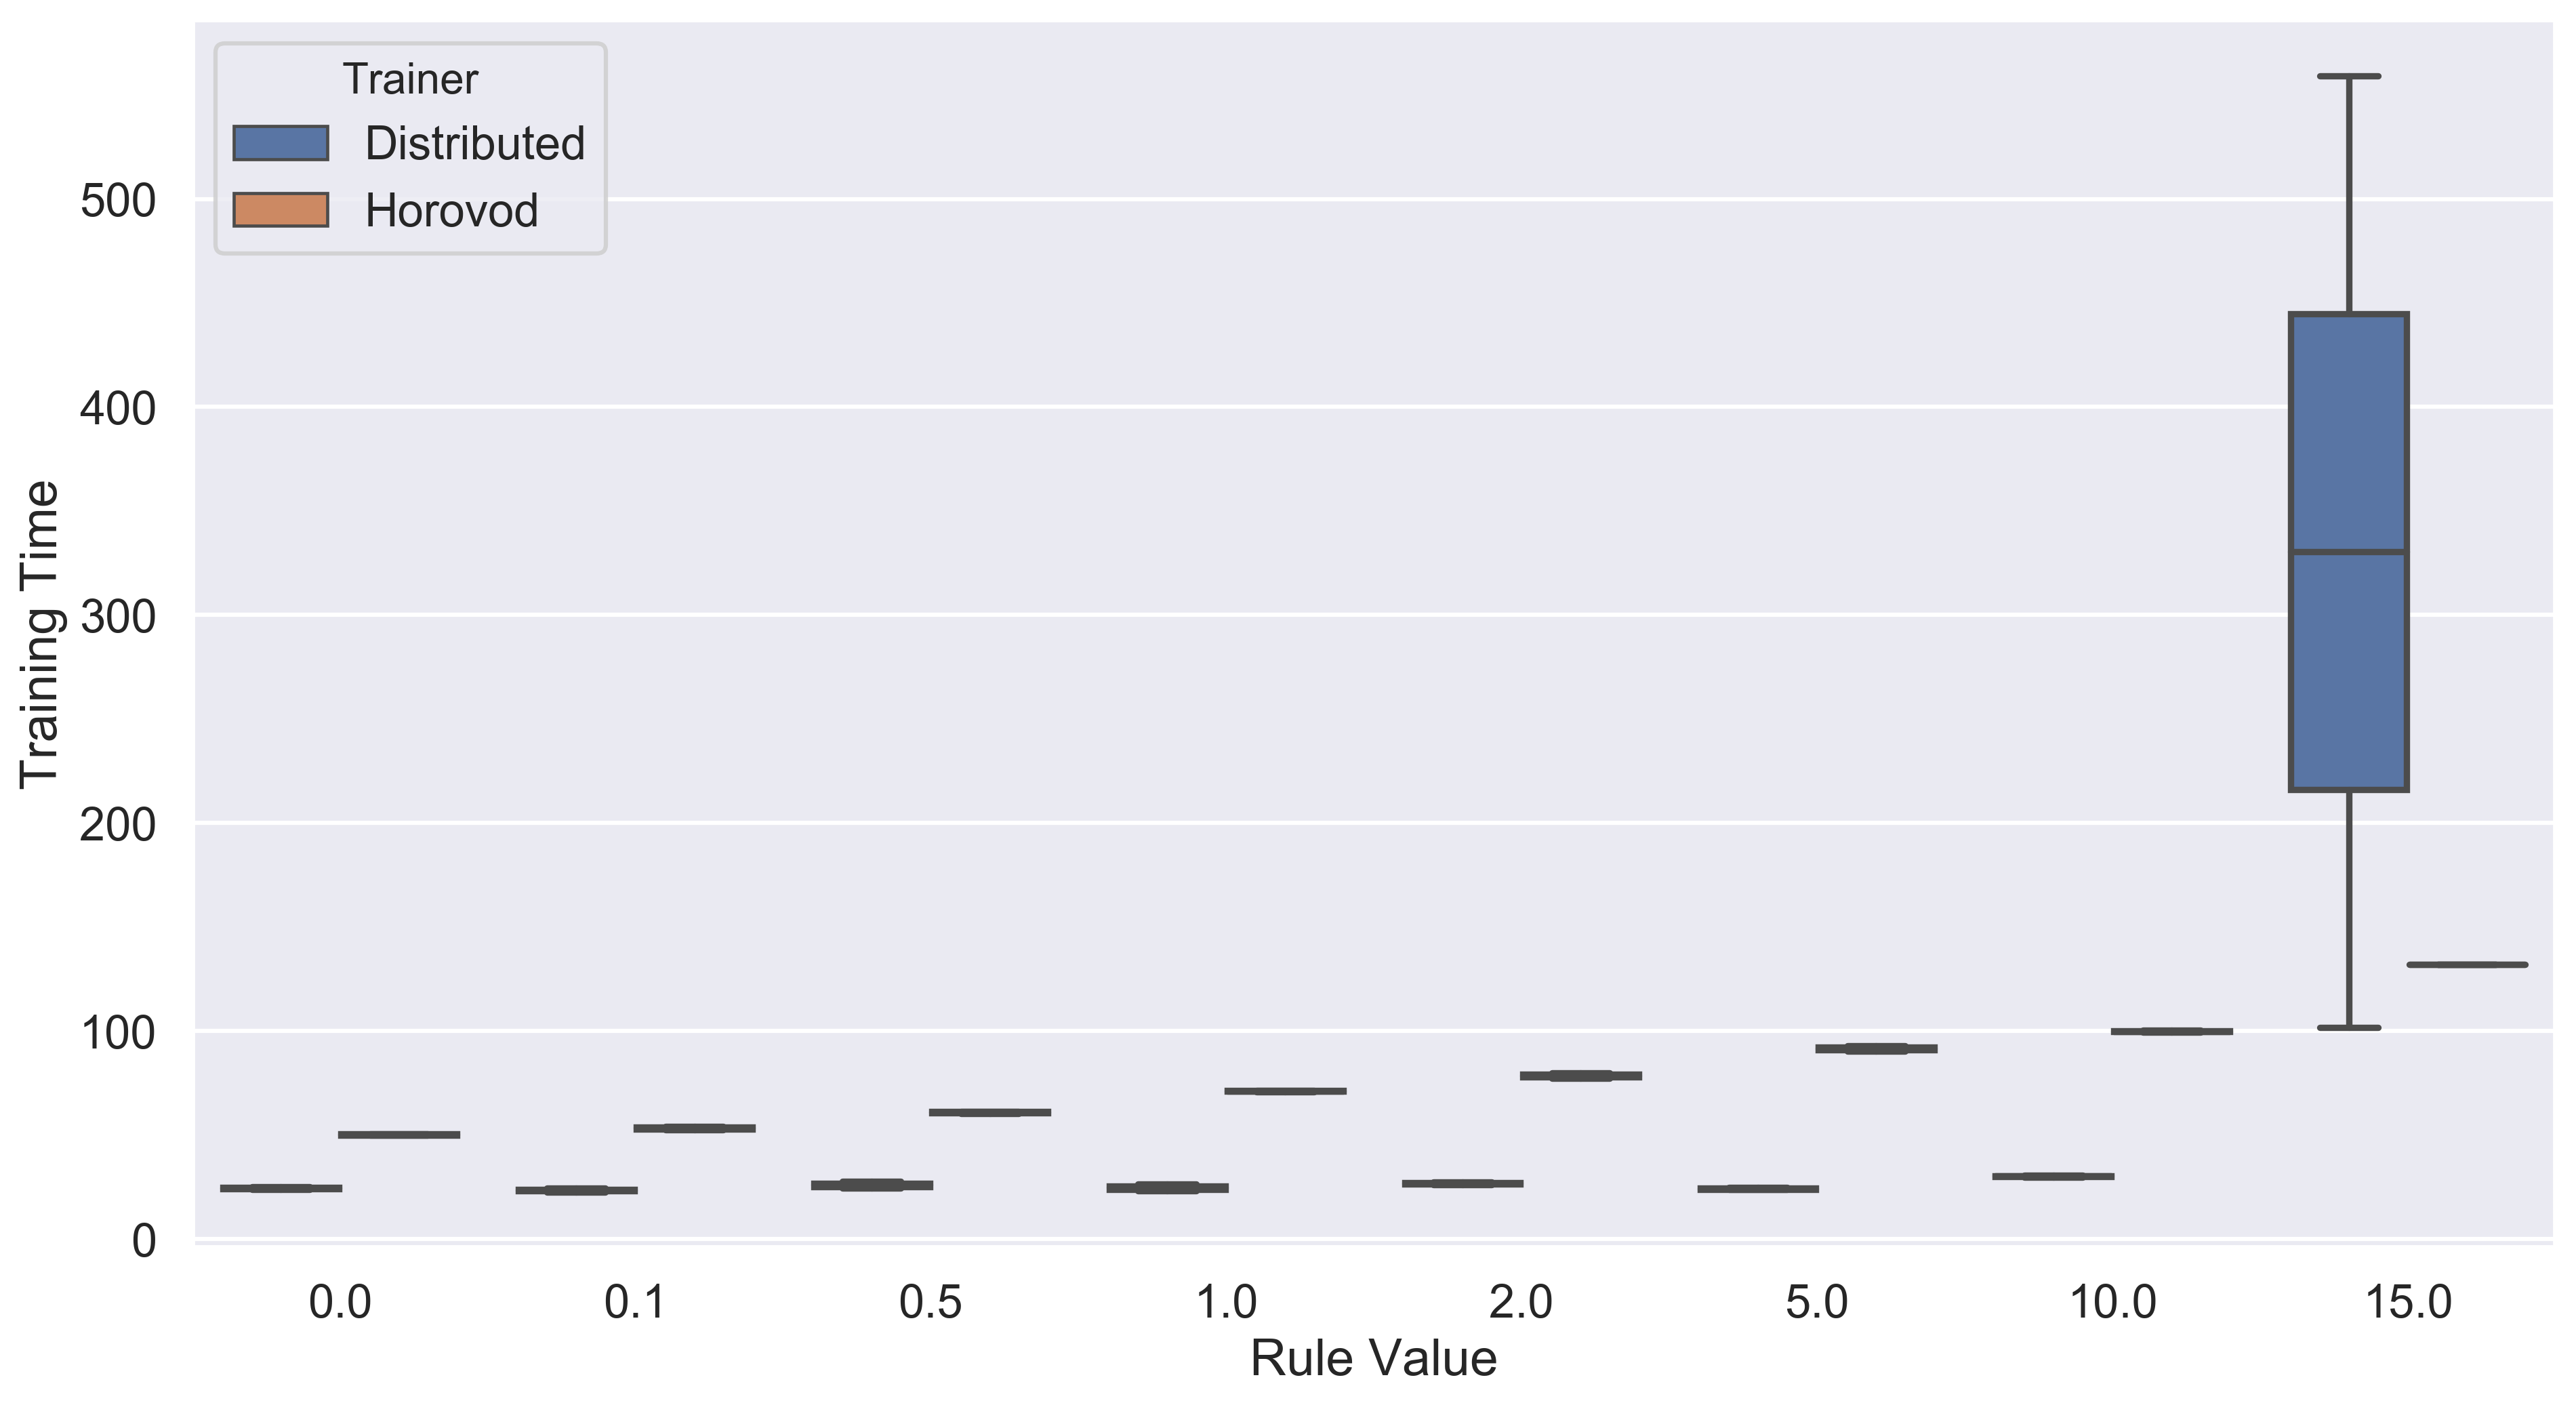

In [71]:
plt.figure(figsize=(15, 8), dpi= 300)
ax = sns.boxplot(x="Rule Value", y="Training Time", hue="Trainer", data=loss)

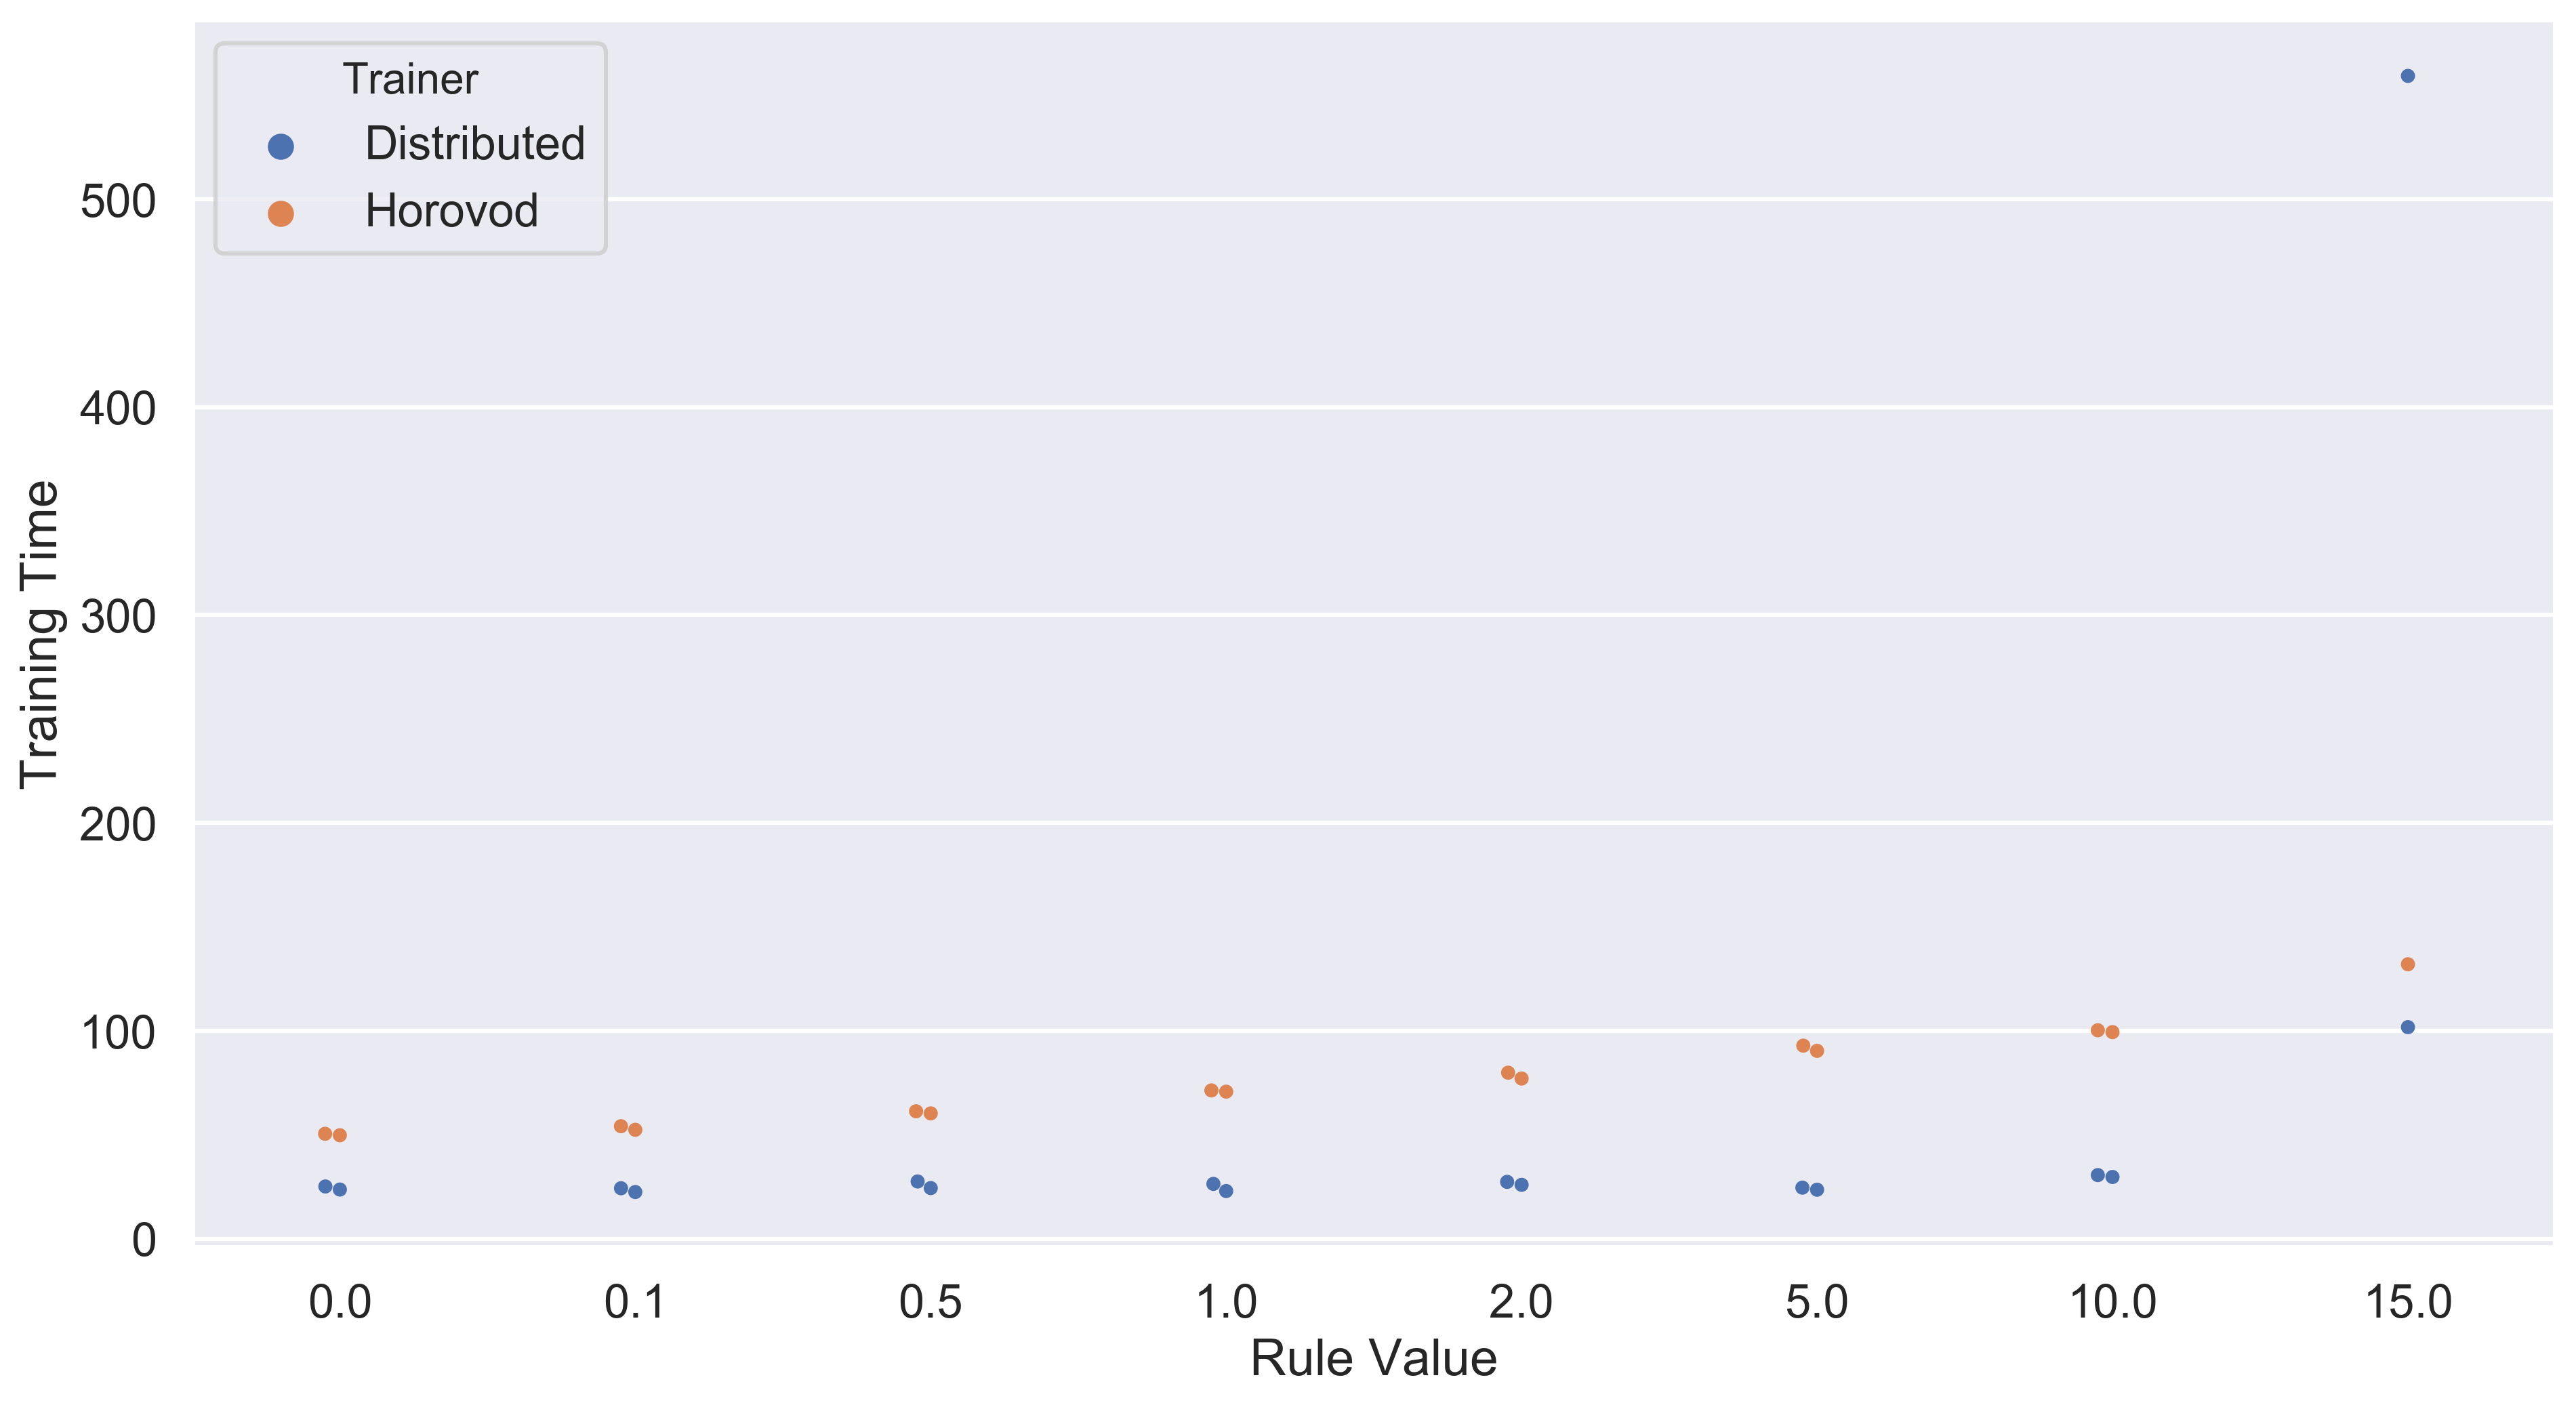

In [73]:
plt.figure(figsize=(15, 8), dpi= 300)
ax = sns.swarmplot(x="Rule Value", y="Training Time", hue="Trainer", data=loss)